<a href="https://colab.research.google.com/github/michelleruas/Variance_Machine_Learning_Project/blob/master/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction Algorithm

In [1]:
#Install libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [12]:
#Load the stock data
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX.csv


In [16]:
#Store data
df = pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-12,305.459991,312.890015,303.239990,310.829987,310.829987,6531700
1,2019-08-13,309.769989,316.429993,308.160004,312.279999,312.279999,5289400
2,2019-08-14,308.010010,308.410004,298.010010,299.109985,299.109985,7355800
3,2019-08-15,299.500000,300.630005,288.000000,295.760010,295.760010,9629200
4,2019-08-16,298.859985,303.549988,296.269989,302.799988,302.799988,6905800
5,2019-08-19,306.250000,311.750000,304.750000,309.380005,309.380005,4942200


In [17]:
#Get the number of trading days
df.shape

(254, 7)

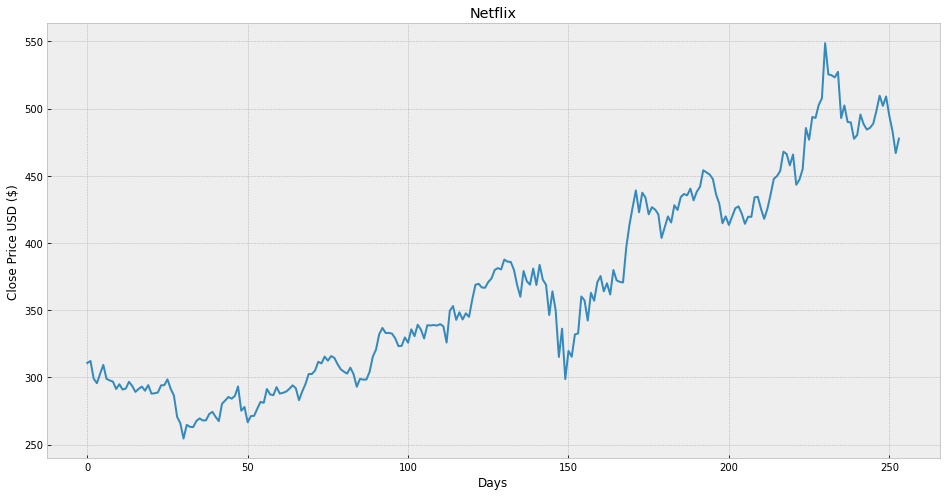

In [20]:
#Visualise the close price data
plt.figure(figsize = (16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [22]:
#Get the close price, create new data frame
df = df[['Close']]
df.head(4)

,Close
0,310.829987
1,312.279999
2,299.109985
3,295.760010


In [26]:
#Create a variable to predict 'x' days into the future
future_days = 25

#Create new column (target) shifted 'x' units / days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Close,Prediction
250,494.730011,NaN
251,483.380005,NaN
252,466.929993,NaN
253,477.708405,NaN


In [28]:
#Create the feature data set (x) and convert it to a numpy array and remove the last x rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
X

array([[310.829987],
       [312.279999],
       [299.109985],
       [295.76001 ],
       [302.799988],
       [309.380005],
       [298.98999 ],
       [297.809998],
       [296.929993],
       [291.440002],
       [294.980011],
       [291.029999],
       [291.769989],
       [296.779999],
       [293.75    ],
       [289.290009],
       [291.519989],
       [293.25    ],
       [290.170013],
       [294.339996],
       [287.98999 ],
       [288.269989],
       [288.859985],
       [294.149994],
       [294.290009],
       [298.600006],
       [291.559998],
       [286.600006],
       [270.75    ],
       [265.920013],
       [254.589996],
       [264.75    ],
       [263.309998],
       [263.079987],
       [267.619995],
       [269.579987],
       [268.029999],
       [268.149994],
       [272.790009],
       [274.459991],
       [270.720001],
       [267.529999],
       [280.480011],
       [282.929993],
       [285.529999],
       [284.25    ],
       [286.279999],
       [293.3